# Understanding rates of changes

## Contents
+ Calculating the average rate of change in a mathematical function
+ Approximating the instantaneous rate of change at a point
+ Picturing how the rate of change is itself changing
+ Reconstructing a function from its rate of change

## Intro
This chapter introduces two of the most important concepts from calculus: the *derivative* and the *integral*. Both of them are operations that work with functions.

> The *derivative* takes a function and gives you another function measuring its rate of change.

> The *integral*, which is the opposite of the *derivative*, takes a function representing a rate of change and gives you back a function measuring the original, cumulative value.

Let's grasp the concepts of rate and cumulative value with an example.

![Oil example](../images/oil_example.png)

+ The sensor on the pipe that measures the amount of oil that is being extracted from the well over the time gives us the *rate of change*.
+ The sensor on the tank, that measures the amount of oil that is currently stored in the tank gives us the *cumulative* value.

There are two main problems that have to do with rates of changes and cumulative values:
+ finding the *rate of change as a function of time* from known cumulative values &mdash; this will be solved using the *derivative*.
+ calculating the cumulative value over the time from a known rate of change &mdash; this will be solved using the *integral*.

For our oil example, we will find a function that gives us the flow rate as a function of time, from the volume over time function `get_flow_rate(volume_function)`, and a function `get_volume(flow_rate_function)` that take the flow rate function over time and returns the volume of oil in the tank over the time function.

## Calculating average flow rate from volume

Let's assume we know the volume of oil in the tank over time, and we are lucky enough to have it encoded as a Python function called `volume(t)`, where $ t $ is the time in hours after a predefined starting point. The function returns the volume in number of barrels *(bbl)*.

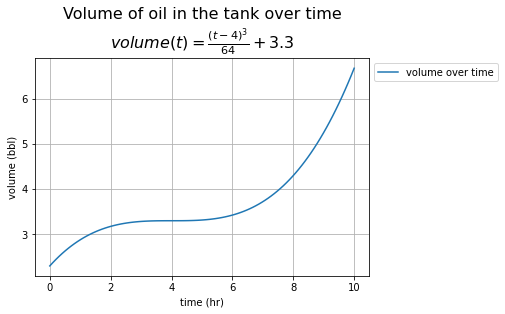

In [14]:
import numpy as np
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
# not needed here
# ax.axhline(y=0, color='black')
# ax.axvline(x=0, color='black')

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $', fontsize=16)

# plotting the volume
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume over time')

plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



We want to find the flow rate into the tank at any point in time, using the function above as the input.

### Implementing an `average_flow_rate` function

Let's start simple by calculating the flow rate intuitively. We will be writing a function `average_flow_rate(v, t1, t2)` that takes a volume function `v(t)` and a start and end time `t1` and `t2`.
The function should return a number that is the average flow rate into the tank on the time interval, that is, the return will be measuring the number of barrels per hour entering the tank.



The way to calculate the average flow is the following:

$
\text{average flow rate} = \frac{\text{change in volume}}{\text{elapsed time}} \text{, measured in }\frac{barrels}{hour}
$

As we're lucky enough to have a function that returns the volume in the tank $ V $ as a function of time $ t $, we can do:

$
\text{average flow rate} = \frac{V(t2) - V(t1)}{t2 - t1}
$

Note that this is how we calculate rates of change in many other different context as well. For example the *speed* is the rate at which you cover distance with respect to time.

In any case, we can already write the function in Python:

```python
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)
```

Let's use the formula to calculate the average flow rate into the tank between the 4-hour mark and the 9-hour mark.

In [3]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)


def v(t):
    return (t - 4) ** 3 / 64 + 3.3

volume_at_beginning = v(4)
volume_at_end = v(9)

print('volume(start)={}'.format(volume_at_beginning))
print('volume(end)={}'.format(volume_at_end))

print('avg_flow_rate={}'.format(average_flow_rate(v, 4, 9)))

volume(start)=3.3
volume(end)=5.253125
avg_flow_rate=0.390625


Note that if we round, we have a change of volume of $ 5.25 - 3.3 = 1.95 \text{ bbl} $.

As we have an interval of 5 hours, the average flow rate should be around $ \frac{1.95 \text{ bbl}}{5 \text{ hours}} = 0.39 \frac{\text{bbl}}{\text{hours}} $

### Picturing the average flow rate with a secant line

Let's interpret what the average flow rate is giving us. In order to do that, let's draw the straight line that goes from `v(4)` to `v(9)`.

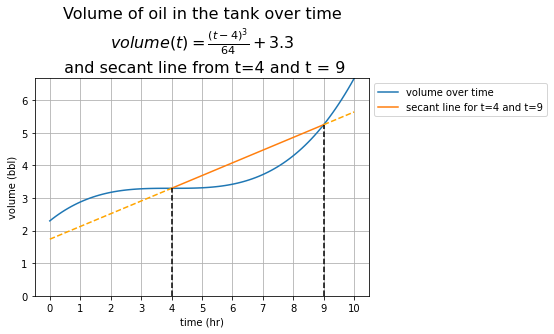

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    return (t - 4) ** 3 / 64 + 3.3

secant_point_start = (4, v(4))
secant_point_end = (9, v(9))

secant_fn = standard_form_fn(secant_point_start, secant_point_end)

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $' 
    '\n and secant line from t=4 and t = 9', fontsize=16)

plt.ylim(0, v(10))
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, v(ts), label='volume over time')

ts = np.linspace(4, 9, 100)
plt.plot(ts, secant_fn(ts), label='secant line for t=4 and t=9')

# this is just styling
ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
ts = np.linspace(9, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(9))
ts = 9 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



As you can see, the graph is higher for $ t = 9 $ than for $ t = 4 $, which means the volumn of oil increased during that period. This causes the secant line to *slope upward*.

> Mathematically, the *slope* is defined as the change in the vertical coordinate divided by the change in the horizontal coordinate.

Now, we see that the secant goes from $ v(4) $ to $ v(9) $. Therefore, the slope for the secant is then $ \frac{v(9) - v(4)}{9 - 4} $, which happens to be the average flow rate between $ t=4 $ and $ t=9 $.

> the slope of a secant line is the same as the average rate of change of a given function:

$
Slope = \frac{V(t_2) - V(t_1)}{t_2 - t_1}
$

![Secant slope is the average rate of change](../images/secant_slope_and_average_rate_of_change.png)

In [ ]:
### Negative rates of change

The secant line can have a negative slope, as can be seen in the image below.

    def decreasing_volume(t):
        if t < 5:
            return 10 - (t**2)/5
        else:
            return 0.2*(10-t)**2

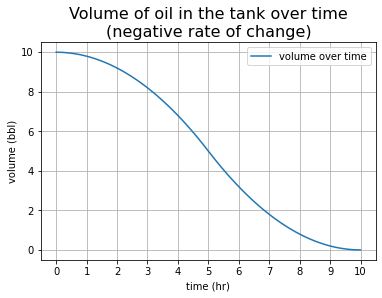

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    '(negative rate of change)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, [v(t) for t in ts], label='volume over time')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



If we perform the same exercise as before, for the time interval between $ t = 0 $ and $ t = 4 $, we can see that:

$
Slope = \frac{V(t2) - V(t1)}{t2 - t1}
$

In [32]:
def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

print('v(0)={}'.format(v(0)))
print('v(4)={}'.format(v(4)))

print('slope=average_rate_flow={}'.format((v(4) - v(0))/(4 - 0)))

v(0)=10.0
v(4)=6.8
slope=average_rate_flow=-0.8


Therefore:

$
Slope=-0.8 \frac{bbl}{hr}
$

Let's see that now the secant has a *downward slope*.

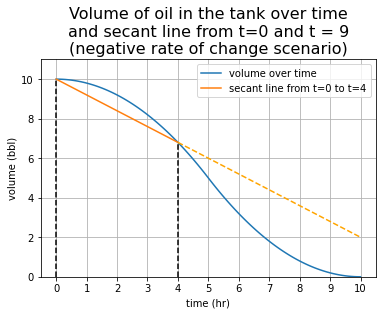

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

secant_point_start = (0, v(0))
secant_point_end = (4, v(4))

secant_fn = standard_form_fn(secant_point_start, secant_point_end)

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'    
    'and secant line from t=0 and t = 9\n'
    '(negative rate of change scenario)', fontsize=16)

plt.ylim(0, v(0) + 1)
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, [v(t) for t in ts], label='volume over time')

ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), label='secant line from t=0 to t=4')

# this is just styling
ts = np.linspace(4, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(0))
ts = np.zeros(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



Therefore:
> the slope of the secant line between two given points gives us the average rate of change of the function

That fact will let us figure out how the flow rate changes over time.

#### Digging into the slope concept

We've seen in the previous section that given a function $ V(t) $, the slope of the *secant* between $ t1 $ and $ t2 $ was defined as:

$
Slope = \frac{V(t2) - V(t1)}{t2 - t1}
$

But let's see what does the slope represent in the equation of the secant line.

We know from the previous chapter that a line in its standard form can be represented as:

$
ax + by = c
$

If we clear out the $ y $ variable we get:

$
y = \frac{(-ax + c)}{b}
$

if we rename the coefficients the equation for the straight line can also be written as:

$
y = mx + n
$

Now, let's get back to the *secant*. We know that it goes through the points $ (t1, V(t1)) $ and $ (t2, V(t2)) $.

Therefore:

$
\begin{cases}
V(t1) = m t1 + n \\
V(t2) = m t2 + n
\end{cases} \Rightarrow \\
n = V(t1) - m t1 \Rightarrow \\
V(t2) = m t2 + V(t1) - m t1 \Rightarrow \\
V(t2) - V(t1) = m (t2 - t1) \Rightarrow \\
m = \frac{V(t2) - V(t1)}{t2 - t1}
$

That is, the *slope* of the secant line between two points of a function is the coefficient of the equation of the line when written as $ y = mx + n $.

## Plotting the average flow rate over time

If we want to get the flow rate function when the volume function is known we will get to the flow rate as a function of time.

By recalling what we've just seen about the slope of the secant line, that is the same as the average flow rate, we see the the average flow rate changes over time.

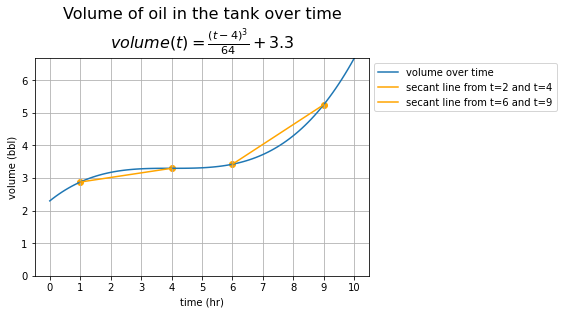

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def v(t):
    return (t - 4) ** 3 / 64 + 3.3


fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $', fontsize=16)

plt.ylim(0, v(10))
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, v(ts), label='volume over time')

# secant line #1
ts = np.linspace(1, 4, 100)
plt.plot(ts, secant_line(v, 1, 4)(ts), label='secant line from t=2 and t=4', color='orange')
plt.scatter([1, 4], [v(1), v(4)], color='orange')

# secant line #2
ts = np.linspace(6, 9, 100)
plt.plot(ts, secant_line(v, 6, 9)(ts), label='secant line from t=6 and t=9', color='orange')
plt.scatter([6, 9], [v(6), v(9)], color='orange')



plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

We see that the flow rate changes over time. For example, the slope is higher in the interval $ (6, 9) $ than it is in $ (1, 4) $.

What we can do to get us closer to our objective of getting the flow rate over time, is to break up the 10 hour perioid in smaller intervals of a fixed duration (example, 10 hour, one-hour intervals) and calculate the average flow rate for each *sub-period*.

We will name this function as:

```python
interval_flow_rates(v, t1, t2, dt)
```

where `v` is the volume function, `t1` and `t2` are the starting and ending times, and `dt` is the fixed duration of the time intervals.

The function should return a list of pairs of time and flowrate:

```python
[(t0, flow_rate(t0)), (t1, flow_rate(t1)), ..., (tn, flow_rate(tn))]
```

Once we get this function, we would be able to plot those values as a *scatter plot*, alongside the real flow rate function and compare the results.

### Finding the average flow rate in different time intervals

At this point we're more or less ready to define the `interval_flow_rates(...)` using NumPy and the formula that gives us the slope of the secant line between two points, which is equal to the average flow rate:

In [10]:
import numpy as np

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3 

for sample_point in interval_flow_rates(volume, 0, 10, 1):
    print(sample_point)


(0, 0.578125)
(1, 0.296875)
(2, 0.109375)
(3, 0.015625)
(4, 0.015625)
(5, 0.109375)
(6, 0.296875)
(7, 0.578125)
(8, 0.953125)
(9, 1.421875)


By looking at the results we see that:
+ the average flow rate is always positive &mdash; there is a net addition of oil into the tank in each hour.
+ the average flow rate hits its minimum around hours 3 and 4, and hits the maximum around hour 9.

### Plotting the interval flow rates

We can use a *scatter plot* to plot the data returned by the `interval_flow_rates(...)` function:

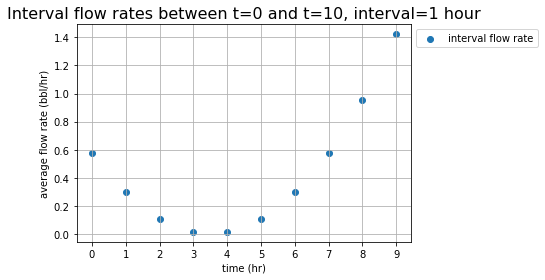

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Interval flow rates between t=0 and t=10, interval=1 hour', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_flow_rates(volume, 0, 10, 1)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')


plt.xlabel(r'time (hr)')
plt.ylabel(r'average flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Note that the chart confirms our data analysis: the average flow rate hits the minimum between hours 3 and 4, and the maximum around t=9.

The actual flow rate function can be computed for that volume function and it is:

$
flow\_rate = \frac{3 (t-4)^2}{64}
$


If we plot that function along with the scatter plot, we'd get:

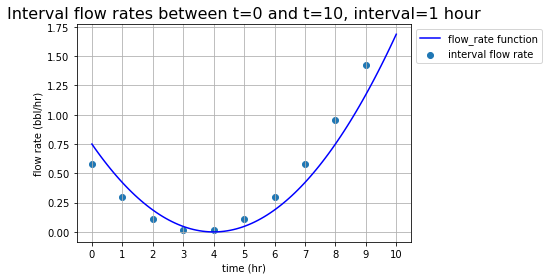

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'Interval flow rates between t=0 and t=10, interval=1 hour', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_flow_rates(volume, 0, 10, 1)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')

# plotting the flow rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='flow_rate function', color='blue')


plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

See how the two plots *tell the same story*, and yet they don't quite match. The difference is that the scatter plot gives us the *average flow rates*, whereas the plot function gives us the *instantaneous value at any point in time*.

It is the same idea of the average speed on a long road trip: you might have a 70 mph average speed, but that does not mean you have kept 70 mph at all intervals.

As a matter of fact, if we slice up the time intervals in smaller periods, we'll get a scatter plot that resembles more the actual function.

For example, if we use 20-min intervals intead of 1-hour ones:

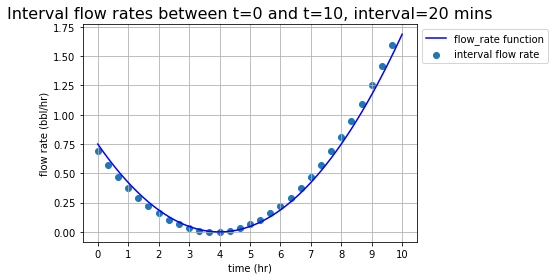

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

def interval_flow_rates(v, t1, t2, dt):
    time_samples = np.arange(t1, t2, dt)
    return [(t, average_flow_rate(v, t, t + dt)) for t in time_samples]

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'Interval flow rates between t=0 and t=10, interval=20 mins', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the interval flow rate as a scatter plot
series = interval_flow_rates(volume, 0, 10, 1/3)
times = [t for (t, _) in series]
rates = [r for (_, r) in series]
plt.scatter(times, rates, label='interval flow rate')

# plotting the flow rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='flow_rate function', color='blue')


plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

This is a lot closer to what the actual flow rate function provides.

## Aproximating instantaneous flow rates

As seen in the previous section, as we make the time intervals in our `interval_flow_rate(...)` smaller and smaller we will get closer to the real function that gives us the instant flow rate over time.

Note however that we cannot make the interval zero:

$
average\_flow\_rate(t) = \frac{V(t) - V(t)}{t - t} = \frac{0}{0}
$

In calculus, there's an operation called the *derivative* that sidesteps this division problem and that will tell us what the instantenous rate of change is.

In this section we will write a function `instantaneous_flow_rate(v, t)` that will take a volume function `v(t)` and a single point in time `t`, and will return an approximation of the instantaneous rate an which oil is flowing into the tank.

Once we have that function, we'll be able to write a *curried* version of `instantaneous_flow_rate(v, t)` called `get_flow_rate_function(v)`.

In [ ]:
### Finding the slope of small secant lines

In this section we will start zooming in the volume function in a certain interval, to demonstrate that in the process the secant lines become closer and closer to the volume function.

Let's start plotting the original function:

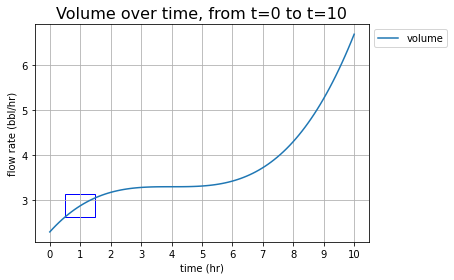

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0 to t=10', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume')

rect = patches.Rectangle((0.5, volume(0.5)), 1, .5, edgecolor='b', facecolor='none')
ax.add_patch(rect)

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Let's focus now on that smaller interval, on which we see that the volume is somewhat curvy.

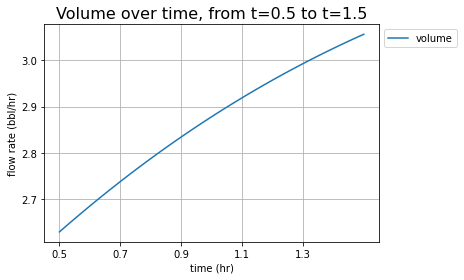

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.5 to t=1.5', fontsize=16)

plt.xticks(np.arange(0.5, 1.5, step=.2))

# plotting the volume function
ts = np.linspace(0.5, 1.5, 100)
plt.plot(ts, volume(ts), label='volume')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

If we know write the secant lines between `0.6` and `1.0` and between `1.0` and `1.4` we get:

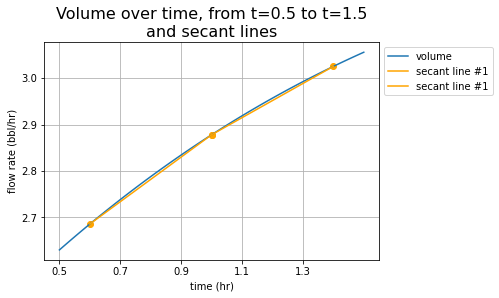

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.5 to t=1.5\n'
    'and secant lines', fontsize=16)

plt.xticks(np.arange(0.5, 1.5, step=.2))

# plotting the volume function
ts = np.linspace(0.5, 1.5, 100)
plt.plot(ts, volume(ts), label='volume')

# plotting the secant_lines
ts = np.linspace(0.6, 1, 100)
plt.plot(ts, secant_line(volume, 0.6, 1)(ts), label='secant line #1', color='orange')
plt.scatter([0.6, 1], [volume(0.6), volume(1)], color='orange')

ts = np.linspace(1, 1.4, 100)
plt.plot(ts, secant_line(volume, 1, 1.4)(ts), label='secant line #2', color='orange')
plt.scatter([1, 1.4], [volume(1), volume(1.4)], color='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

If we zoom even further (for example, between `0.9` and `1.1`) the graph looks more and more constant and closer to the actual line.

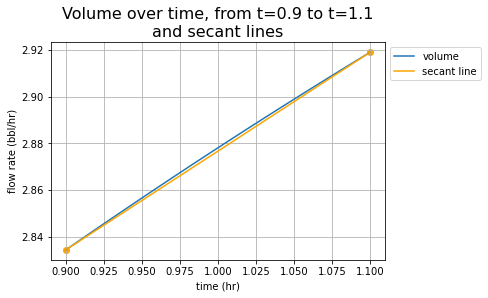

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.9 to t=1.1\n'
    'and secant lines', fontsize=16)

plt.xticks(np.arange(0.9, 1.1, step=.025))

# plotting the volume function
ts = np.linspace(0.9, 1.1, 100)
plt.plot(ts, volume(ts), label='volume')

# plotting the secant_line
ts = np.linspace(0.9, 1.1, 100)
plt.plot(ts, secant_line(volume, 0.9, 1.1)(ts), label='secant line', color='orange')
plt.scatter([0.9, 1.1], [volume(0.9), volume(1.1)], color='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

If we zoom once more betwen `t = 0.99` and `t = 1.01`, the volume will become indistiguishable from a straight line.

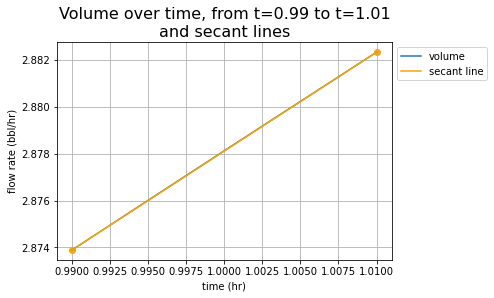

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import secant_line

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0.99 to t=1.01\n'
    'and secant lines', fontsize=16)

plt.xticks(np.arange(0.99, 1.01, step=.0025))

# plotting the volume function
ts = np.linspace(0.99, 1.01, 100)
plt.plot(ts, volume(ts), label='volume')

# plotting the secant_line
ts = np.linspace(0.99, 1.01, 100)
plt.plot(ts, secant_line(volume, 0.99, 1.01)(ts), label='secant line', color='orange')
plt.scatter([0.99, 1.01], [volume(0.99), volume(1.01)], color='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In summary, the closer we zoom in, the more the volume function looks like a straight line, and the more the secant line approximates to the volume function.

> There is a best line approximating a curve graph at any point.

In practice, we see that the slopes of the secant line on smaller intervals *converge* to a single value:

In [34]:
from my_linear_equations import average_rate

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

print(average_rate(volume, 0.5, 1.5))
print(average_rate(volume, 0.9, 1.1))
print(average_rate(volume, 0.99, 1.01))
print(average_rate(volume, 0.999, 1.001))
print(average_rate(volume, 0.9999, 1.0001))
print(average_rate(volume, 0.99999, 1.00001))

0.42578125
0.4220312499999988
0.42187656249998945
0.42187501562509583
0.42187500015393936
0.4218750000002602


Thus, we see that the number we're approaching for the instant flow rate at `t=1.0` is `0.421875`.

We know that the slope at `t=1.0` is then `0.421875`.
We can plot the line with that slope along with the volume curve:

$
y = mx + n \text{, m=0.421875} \\
V(1.0)=2.878125 \Rightarrow n=2.878125 - 0.421875
$

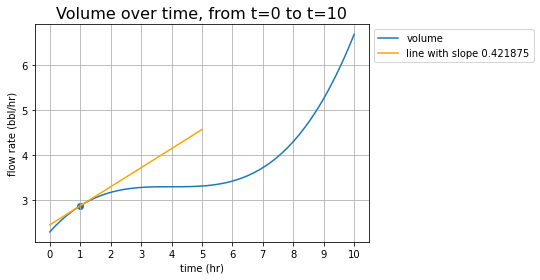

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def line_function(t):
    return 0.421875 * t + (2.878125 - 0.421875)

# Plot
fig, ax = plt.subplots()

plt.title(
    'Volume over time, from t=0 to t=10', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume')

ts = np.linspace(0, 5, 100)
plt.plot(ts, line_function(ts), label='line with slope 0.421875', color='orange')

plt.scatter(1, volume(1), color='C0')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()    

This line is called the *tangent line* to the graph at the point `t=1`. This line lies flat against the graph of the curve at that point.

The tangent line is the line that best approximates the curve's graph, its slope is the best measure of the instantaneous slope of the graph, and therefore, gives us the best approximation to the instantaneous rate.

Actually, if we use the instantaneous flow_rate function we would get the same value:

In [42]:
def flow_rate(t):
    return 3*(t-4)**2 / 64

print(flow_rate(1))    

0.421875


It must be noted that to have a tangent line, the function needs to be *'smooth'*. If the function does not qualify to this *smoothness*, there'll be no line of best approximation.

> When we can find a tangent line to the graph of a function at a point, its slope is called the **derivative of the function at that point**.

In our previous example, the derivative of the volume function at the point `t=1` is 0.421875, which is the slope of the tangent line at that point.

### Building the instantaneous flow rate function

In the previous section we saw that it is very easy for the human eye to see what is the number the slope of the tangent line is converting to. However, that is not that simple for a Python based algorithm.

However, brute force approaches are easy to implement in Python. For example, we can calculate slopes of smaller and smaller secant lines until they stabilize to some fixed number of decimal digits.

When using that approach, we just need to set up some criteria &mdash; for example, find the slopes of a series of secant lines, each a tenth as wide as the previous one, until the value stabilizes up to four decimal places.

If we harvest the previous data we computed for the slope at `1.0` and put it on a table:

| Secant line interval | Secant line slope   |
| :------------------- | :------------------ |
| 0.5 to 1.5           | 0.42578125          |
| 0.9 to 1.1           | 0.4220312499999988  |
| 0.99 to 1.01         | 0.42187656249998945 |
| 0.999 to 1.001       | 0.42187501562509583 |

In the last two computed values, the slope is `0.4218` (i.e. the secant line slope for the two values is less than $ 10^{-4} $), so we could say that the slope of the secant line at 1.0 is `0.4219`.

Also, it is very easy to programmatically detect if after a certain (large) number of iterations, we haven't converged to the specified number of digits. In that case, we can say that there's no line of best approximation, and therefore, no derivative at that point.

Let's define this Python function:

In [2]:
from my_linear_equations import average_rate

def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10 ** (-digits)
    h = 1
    approx = average_rate(v, t - h, t + h)
    for i in range(0, 2 * digits):
        h = h / 10
        next_approx = average_rate(v, t - h, t + h)
        if abs(next_approx - approx) < tolerance:
            return round(next_approx, digits)
        else:
            approx = next_approx
    raise Exception('Derivative did not converge in {} iterations'.format(2 * digits))


def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

print(instantaneous_flow_rate(volume, 1.0))


0.421875


### Currying and plotting the instantaneous flow rate function

Now, we have everything in our toolbox to come up with a Python function that will give us the flow rate function, given the volume function.

And once we have the function, we can finally plot it.

| NOTE: |
| :---- |
| Similarly, we will be able to generalize the approach to obtain the rate of change function for any function. |

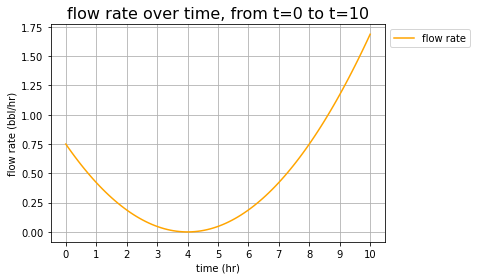

In [4]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

def get_flow_rate_function(v):
    def flow_rate_function(t):
        return instantaneous_rate(v, t)
    return flow_rate_function

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
flow_rate = get_flow_rate_function(volume)
plt.plot(ts, [flow_rate(t) for t in ts], label='flow rate', color='orange')


plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

With this we have completed the first major goal of the chapter:
> given a `volume` function, compute the corresponding `flow_rate_function`.

This procedure is called *taking a derivative*, and its physical significance as we've seen is that:
> given function, the *derivative* at any given point gives us the instantaneous rate of change of the function, provided that the original functions is sufficiently smooth.

In computer science terms, we can think of the *derivative* as an algorithm that given a function gives us another function that measures the rate of change of the original one:

![derivative as a transformation](../images/derivative_as_a_transformation.png)

In more strict terms, the derivative is a general procedure that works on any function $ f(x) $, which is smooth enough to have tangent lines at every point.

The derivative of a function $ f $ is written as $ f' $, so that $ f'(x) $ means the instantaneous rate of change of in $ f $ with respect to $ x $.

Specifically, $ f'(5) $ is the derivative of $ f(x) $ at $ x = 5 $, which is the slope of the tangent line to $ f $ at $ x = 5 $.

Another common notations you might find are:

$
\displaystyle
f'(x) = \frac{df}{dx} = \frac{d}{d}f(x)
$

The $ df $ and $ dx $ mean infinitesimal changes in $ f $ and $ x $. The notation $ \frac{d}{dx} $ means the operation of *taking the derivative with respect to $ x $.

This notation is especially meaningful, as it makes the derivative look like an operation that you apply to $ f(x) $ and that returns another function:

![derivative as a function](../images/derivative_as_a_function.png)


## Approximating the change in volume

Now we will turn to the derivative's counterpart operation &mdash; the *integral*.

What we intend to do in this section is to reconstruct the *volume* function starting with a known *flow rate* function.

This is the reverse of the process of finding a derivative, as from a known rate of change function, we want to recover the original function. In calculus, this is called *integration*.

The way to do it will be breaking the process of finding the *integral* into smaller steps that will give us a sense about what integration means.

We will first define a function `brief_volume_change(q, t, dt)` that will take a flow rate function `q`, a time instant `t` and a short time duration `dt` will give us the approximate change in volume from time `t` to time `t + dt`.

We will then define a second function `volume_change(q, t1, t2, dt)` that will give us the volume change on any time interval (no matter if short or long). The function will break the given time interval into increments of duration `dt` short enough to be used with `brief_volume_change(...)`. The total volume change returned will be the sum of all of the volume changes on the short time interval.

### Finding the change in volume for a short time interval

To understand the rationale behind the `brief_volume_change(...)` function we're looking for, let's consider first the familiar scenario of the speedometer in a a car. If it reads 60mph, you might predict that in the next 2 hours you'll travel 120 miles. That estimate will be correct if you keep travelling at exactly that speed, but it is more than possible that you're forced to go faster or slower, especially if you're considering a large interval like 2 hours.

However, if you look at the speedometer and it reads 60mph and you use that value to calculate how far you traveled in a single second, you'll surely get a very accurate answer, because that speed is not going to change than much in such a short interval.

Actually:

$
\displaystyle 60 \, \frac{miles}{hour} \cdot \frac{1 \, hour}{3600 \, seconds} = \\
\displaystyle \frac{60}{3600} \, \frac{miles}{seconds} = \frac{1}{60} \, \frac{miles}{second} = \\
\displaystyle  \frac{1}{60} \, \frac{miles}{second} \cdot \frac{5280}{1} \, \frac{feet}{mile} = \\
\displaystyle 88 \, \frac{feet}{second}
$

We'll use the same reasoning for our `brief_volume_change(...)` &mdash; we'll have a look at our flow rate in a short interval and extrapolate what the volume change is.

If we assume such a short interval, so that the flow rate is *roughly* constant we can say:

$
\displaystyle flow \; rate \approx average \; flow \; rate = \frac{change \; in \; volume}{elapsed \; time}
$

Rearranging the equation:

$
\displaystyle change \; in \; volume \approx flow \; rate \times elapsed \; time
$

Now we're ready to define our `small_volume_change(...)` Python function:

```Python
def small_volume_change(q, t, dt):
    return q(t) * dt
```

As we have an actual pair of volume an flow rate functions we can test how good that approximation is for the one-hour interval from t = 2 to t = 3.


In [2]:
def small_volume_change(q, t, dt):
    return q(t) * dt

def flow_rate(t):
    return 3*(t-4)**2 / 64

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3
    
print('small_volume_change(flow_rate, 2, 1)={}'.format(small_volume_change(flow_rate, 2, 1)))

print('Actual volume change in the interval: volume(3) - volume(2)={}'.format(volume(3) - volume(2)))

small_volume_change(flow_rate, 2, 1)=0.1875
Actual volume change in the interval: volume(3) - volume(2)=0.109375


As you can see, the estimation is *far-off* for a one-hour interval, roughly, the estimation is 1.71 larger (around 70%).

However, let's see what happens when we bring down the interval to `0.01` hours:

In [3]:
def small_volume_change(q, t, dt):
    return q(t) * dt

def flow_rate(t):
    return 3*(t-4)**2 / 64

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3
    
print('small_volume_change(flow_rate, 2, 0.01)={}'.format(small_volume_change(flow_rate, 2, 0.01)))

print('Actual volume change in the interval: volume(2.01) - volume(2)={}'.format(volume(2.01) - volume(2)))

small_volume_change(flow_rate, 2, 0.01)=0.001875
Actual volume change in the interval: volume(2.01) - volume(2)=0.0018656406250001645


Now, the estimation is pretty accurate (the estimation is only 0.995 smaller, meaning it is about only 1% off).

### Breaking up into smaller intervals

Nowe we will tackle the definition of our `volume_change(q, t1, t2, dt)` function by splitting the time from `t1` to `t2` into intervals of duration `dt`.

For simplicity, we will only handle values of `dt` that divide the `t2 - t1` interval evenly, into a whole number of intervals.

This can be easily done if we lean once again in *NumPy*, specifically the `np.arange()` function:

```python
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))
```

In [ ]:
With this function, we can break up the t=0 to t=10 interval into 100 time intervals of 0.1 hours duration and calculate with the actual volume change in the period.

In [5]:
import numpy as np

def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def flow_rate(t):
    return 3*(t-4)**2 / 64

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3
    
print('volume_change(flow_rate, 0, 10, 0.1)={}'.format(volume_change(flow_rate, 0, 10, 0.1)))

print('Actual volume change in the interval: volume(10) - volume(0)={}'.format(volume(10) - volume(0)))

volume_change(flow_rate, 0, 10, 0.1)=4.32890625
Actual volume change in the interval: volume(10) - volume(0)=4.375


In [ ]:
Not a bad approximation: we see that the estimation is 0.99 smaller than the actual value (1%).

As you can expect, we can make intervals smaller and smaller, and our function will provide more accurate results.

In [18]:
import numpy as np

def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def flow_rate(t):
    return 3*(t-4)**2 / 64

def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

estimated = volume_change(flow_rate, 0, 10, 0.01)
print('volume_change(flow_rate, 0, 10, 0.1)={}'.format(estimated))

actual = volume(10) - volume(0)
print('Actual volume change in the interval: volume(10) - volume(0)={}'.format(actual))

err_ratio = round(estimated / actual, 3)
err_pct = round(abs(1 - err_ratio) * 100, 3)
print('Error: {}/{}={} ({} %)'.format(estimated, actual, err_ratio, err_pct))

volume_change(flow_rate, 0, 10, 0.1)=4.370320312500006
Actual volume change in the interval: volume(10) - volume(0)=4.375
Error: 4.370320312500006/4.375=0.999 (0.1 %)


### Picturing the valume change on the flow rate graph

Let's consider the following chart, in which we have broken down the 10 hour period into 1-hour intervals for the actual flow_rate function:

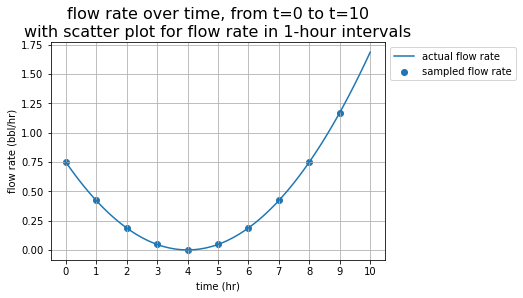

In [23]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10\n'
    'with scatter plot for flow rate in 1-hour intervals', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='actual flow rate', color='C0')

# plotting the flow_rate values at t=0,1,2,...10
ts = np.arange(0, 10, step=1)
plt.scatter(ts, flow_rate(ts), label='sampled flow rate', color='C0')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

Our reasoning for defining the `volume_change` function assumed the flow rate to be constant in the selected intervals.

We can picture it by creating a *ladder* plot as seen below:

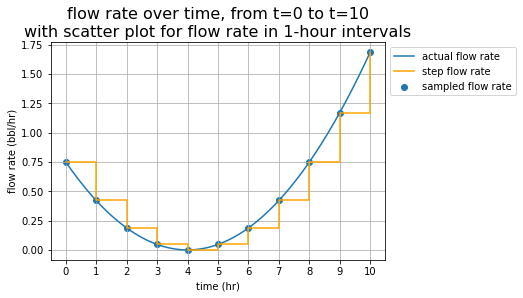

In [27]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10\n'
    'with scatter plot for flow rate in 1-hour intervals', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='actual flow rate', color='C0')

# plotting the flow_rate values at t=0,1,2,...10
ts = np.arange(0, 11, step=1)
plt.scatter(ts, flow_rate(ts), label='sampled flow rate', color='C0')

# plotting the ladder chart (step plot in stricter terms)
ts = np.arange(0, 11, step=1)
plt.step(ts, flow_rate(ts), label='step flow rate', color='orange', where='post')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

In each interval, we calculate the flow rate (the height of each flat graph segment) and multiply it by the width of each segment (which is one hour).

Each small volume we calculate is a height multiplied by a width on the graph, which is the area of an imaginary rectangle on the graph.

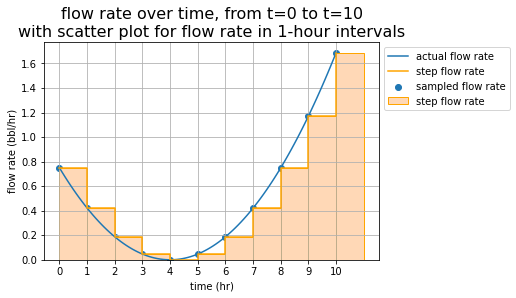

In [35]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10\n'
    'with scatter plot for flow rate in 1-hour intervals', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='actual flow rate', color='C0')

# plotting the flow_rate values at t=0,1,2,...10
ts = np.arange(0, 11, step=1)
plt.scatter(ts, flow_rate(ts), label='sampled flow rate', color='C0')

# plotting the ladder chart (step plot in stricter terms)
ts = np.arange(0, 11, step=1)
plt.step(ts, flow_rate(ts), label='step flow rate', color='orange', where='post')

# plotting the rectangles
ts = np.arange(0, 11, step=1)
plt.bar(ts, flow_rate(ts), 1, align='edge', label='flow rate bars', color='#FFD8B6', edgecolor='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

As we shorten the time intervals, we see that our results improve in the same way our function did.

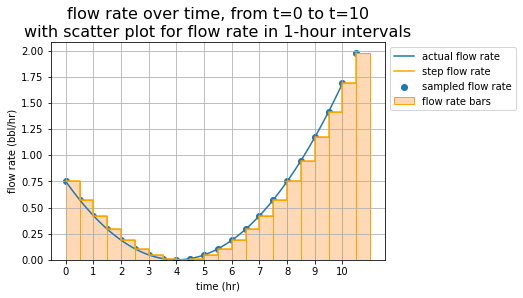

In [38]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10\n'
    'with scatter plot for flow rate in 1-hour intervals', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='actual flow rate', color='C0')

# plotting the flow_rate values at t=0,1,2,...10
ts = np.arange(0, 11, step=0.5)
plt.scatter(ts, flow_rate(ts), label='sampled flow rate', color='C0')

# plotting the ladder chart (step plot in stricter terms)
ts = np.arange(0, 11, step=0.5)
plt.step(ts, flow_rate(ts), label='step flow rate', color='orange', where='post')

# plotting the rectangles
ts = np.arange(0, 11, step=0.5)
plt.bar(ts, flow_rate(ts), 0.5, align='edge', label='flow rate bars', color='#FFD8B6', edgecolor='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

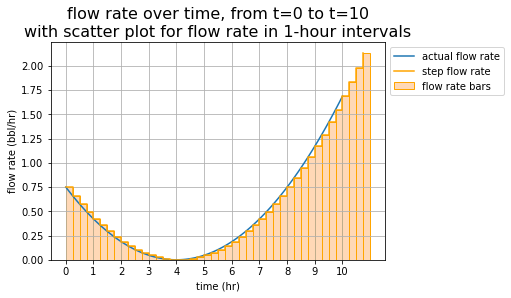

In [40]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

def flow_rate(t):
    return 3*(t-4)**2 / 64

# Plot
fig, ax = plt.subplots()

plt.title(
    'flow rate over time, from t=0 to t=10\n'
    'with scatter plot for flow rate in 1-hour intervals', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the flow_rate function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='actual flow rate', color='C0')

# plotting the flow_rate values at t=0,1,2,...10
# ts = np.arange(0, 11, step=0.25)
# plt.scatter(ts, flow_rate(ts), label='sampled flow rate', color='C0')

# plotting the ladder chart (step plot in stricter terms)
ts = np.arange(0, 11, step=0.25)
plt.step(ts, flow_rate(ts), label='step flow rate', color='orange', where='post')

# plotting the rectangles
ts = np.arange(0, 11, step=0.25)
plt.bar(ts, flow_rate(ts), 0.25, align='edge', label='flow rate bars', color='#FFD8B6', edgecolor='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'flow rate (bbl/hr)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

As the intervals get smaller, our estimated results come closer to filling the sopace under the flow rate graph.
The insight to remember is that the area under the flow rate graph on a given time interval is approximately equal to the volume added to the tank on the same interval.

A sum of the areas of the rectangles that approximate the area is called a *Riemann sum*. *Riemann sum* made of thinner and thinner rectangles converge to the area under a graph, much as the same way slopes of smaller and smaller secant lines converge to the slope of a tangent line.

Now we're in a very good position to find the volume function over time.

## Plotting the volume over time

The main goal of this section is to come up with the total volume in the tank at any given point in time.

Let's consider the following question:
> if oil flows into the tank at a constant rate of 1.2 bbl/hr for 3 hours, how much oil is in the tank after 3 hours?

The answer depends on how much oil was in the tank to begin with. If for example, we knew that there were $ 0.5 bbls $, then:

$
\displaystyle
total \; volume \; after \; 3 \, hours = 0.5 \, bbl + 1.2 \, bbl/hr \times 3 \, hr =\\
\displaystyle
0.5 + 3.6 = 4.1 \, bbls
$

We can use the same idea to reconstruct the volume function. We can implement a Python function `approximate_volume(q, v0, dt, T)` which takes:
+ the flow rate function `q`
+ an initial volume of oil in the tank `v0`
+ a small time interval `dt`
+ the time in at which we want to know the volume `T`

The output will be a function that gives us an approximation of the total volume in the tank at time `T`, by adding the starting volume `v0` to the different changes in volume in the intervals.

Right after that, we can *curry it* to get a function called `approximate_volume_function(q, v0, dt)` which will give us the approximate value of the volume as a function of time.

### Finding the volume over time

Thus, we will calculate the volume at time T as:

$
volume \; at \; time \; T = (volume \; at \; time \; 0) + (change \; in \; volume \; from \; time \; 0 \; to \; time \; T)
$

Note that the first term needs to be taken as an *initial condition*, because there is no way to infer it from the flow rate function. For the second term, we can use our already defined `volume_change(...)` function.

Therefore, we can do:

```python
def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)
```

Then, we can take our familiar approach for *currying* functions in Python:

```python
def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function
```

Now, if we assume `v0=2.3`, which is the initial volume given by the actual volume function we have been using in this chapter, we end up having all the necessary elements to plot our function and compare it to the actual volume function.

v0=2.3


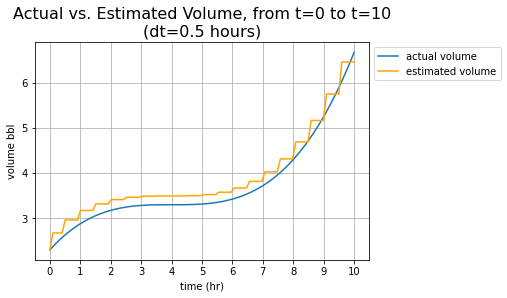

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# This is the actual volume function
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# This is the actual flow rate function
def flow_rate(t):
    return 3*(t-4)**2 / 64

# These are the functions used to come up with the estimated volume function
def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

# We need v0 as initial data
v0 = volume(0)
print('v0={}'.format(v0))

# Plot
fig, ax = plt.subplots()

plt.title(
    'Actual vs. Estimated Volume, from t=0 to t=10\n'
    '(dt=0.5 hours)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the actual volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='actual volume', color='C0')

# plotting the estimated volume function
ts = np.linspace(0, 10, 100)
estimated_volume_fn = approximate_volume_function(flow_rate, v0, 0.5)
plt.plot(ts, [estimated_volume_fn(t) for t in ts], label='estimated volume', color='orange')

plt.xlabel('time (hr)')
plt.ylabel('volume bbl')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()            

We see that the output, even when using a pretty large `dt` value of 0.5 hours is quite close to the actual function.

Intuition tells us that if we reduce `dt` we'll get a better approximation, but let's dig in a little bit to to validate our intuition.

### Picturing *Riemann sums* for the volume function

According to the formula we're using, at any point in time, the volume in the tank will be the sum of the initial volume plus the change in volume to that point.

For example, for t = 4 hr

$
volume(4) = volume(0) + (change \; in \; volume \; from \; 0 \; to \; 4) 
$

The result of that formula will give us one point in the graph, consisting in the sum of the different *rectangles* each having a width of 0.5 hours which results in roughly 3.5 bbls.

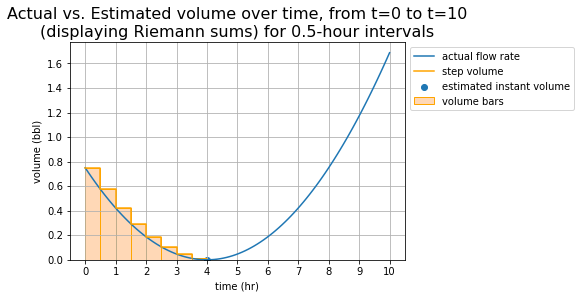

In [14]:
from my_linear_equations import instantaneous_rate
import numpy as np
import matplotlib.pyplot as plt

# This is the actual volume function
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# This is the actual flow rate function
def flow_rate(t):
    return 3*(t-4)**2 / 64

# These are the functions used to come up with the estimated volume function
def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function
# Plot
fig, ax = plt.subplots()

plt.title(
    'Actual vs. Estimated flow rate over time, from t=0 to t=10\n'
    '(displaying Riemann sums) for 0.5-hour intervals', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the actual volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, flow_rate(ts), label='actual flow rate', color='C0')

# plotting the volume points at t = 4, t = 8
ts = [4]
plt.scatter(ts, [flow_rate(t) for t in ts], label='estimated instant volume', color='C0')

# plotting the ladder chart (step plot in stricter terms)
ts = np.arange(0, 4, step=0.5)
plt.step(ts, [flow_rate(t) for t in ts], label='step volume', color='orange', where='post')

# plotting the rectangles
ts = np.arange(0, 4, step=0.5)
plt.bar(ts, [flow_rate(t) for t in ts], 0.5, align='edge', label='volume bars', color='#FFD8B6', edgecolor='orange')

plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()        

In the plot above we see the rectangles that are used for computing the volume at any point in time. For example, for t = 4:

In [19]:
v0=2.3

area_1 = flow_rate(0) * 0.5
print('area_1={}'.format(area_1))

area_2 = flow_rate(0.5) * 0.5
print('area_2={}'.format(area_2))

area_3 = flow_rate(1.0) * 0.5
print('area_3={}'.format(area_3))

area_4 = flow_rate(1.5) * 0.5
print('area_4={}'.format(area_4))

area_5 = flow_rate(2.0) * 0.5
print('area_5={}'.format(area_5))

area_6 = flow_rate(2.5) * 0.5
print('area_6={}'.format(area_6))

area_7 = flow_rate(3.0) * 0.5
print('area_7={}'.format(area_7))

area_8 = flow_rate(3.5) * 0.5
print('area_8={}'.format(area_8))

areas = [area_1, area_2, area_3, area_4, area_5, area_6, area_7, area_8]

print('volume(4)={} + {}={}'.format(v0, sum(areas), v0 + sum(areas)))

area_1=0.375
area_2=0.287109375
area_3=0.2109375
area_4=0.146484375
area_5=0.09375
area_6=0.052734375
area_7=0.0234375
area_8=0.005859375
volume(4)=2.3 + 1.1953125=3.4953125


Note that this matches the result of our `approximate_function`:

In [20]:
import numpy as np

# This is the actual flow rate function
def flow_rate(t):
    return 3*(t-4)**2 / 64

# These are the functions used to come up with the estimated volume function
def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

print('approximate_volume(flow_rate, v0, 0.5, 4)={}'.format(approximate_volume(flow_rate, 2.3, 0.5, 4)))

approximate_volume(flow_rate, v0, 0.5, 4)=3.4953125


We could do the same for any other point in time.

Another interesting question is how the code gets the approximate volume at points which are not divisible by the `dt` value, for example at 3.9 hours.

In order to do that, we need to do a small adjustment in our code when calculating the values:

```python
np.arange(0, 3.9, 0.5)
```

That will give us eight rectangles of width 0.5 hours, and obviously, it goes past the 3.9 hour mark. 

It is also clear that if we reduce the `dt` value, there will be less error due to *overshooting* the end of a time interval.

### Improving the approximation

Let's plot again our approximate volume with a smaller `dt=0.1`.

v0=2.3


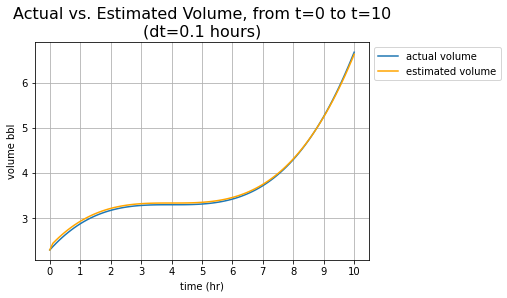

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# This is the actual volume function
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# This is the actual flow rate function
def flow_rate(t):
    return 3*(t-4)**2 / 64

# These are the functions used to come up with the estimated volume function
def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

# We need v0 as initial data
v0 = volume(0)
print('v0={}'.format(v0))

# Plot
fig, ax = plt.subplots()

plt.title(
    'Actual vs. Estimated Volume, from t=0 to t=10\n'
    '(dt=0.1 hours)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the actual volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='actual volume', color='C0')

# plotting the estimated volume function
ts = np.linspace(0, 10, 100)
estimated_volume_fn = approximate_volume_function(flow_rate, v0, 0.1)
plt.plot(ts, [estimated_volume_fn(t) for t in ts], label='estimated volume', color='orange')

plt.xlabel('time (hr)')
plt.ylabel('volume bbl')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()            

We see that by reducing the `dt` from `0.5` to `0.1` the estimated volume function is almost the same as the plot for the actual volume.

If we reduce the `dt` even more, the plots become indistiguishable:

v0=2.3


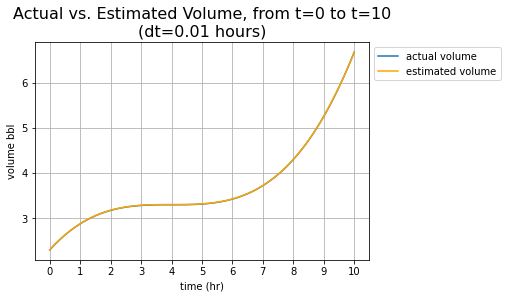

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# This is the actual volume function
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# This is the actual flow rate function
def flow_rate(t):
    return 3*(t-4)**2 / 64

# These are the functions used to come up with the estimated volume function
def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function

# We need v0 as initial data
v0 = volume(0)
print('v0={}'.format(v0))

# Plot
fig, ax = plt.subplots()

plt.title(
    'Actual vs. Estimated Volume, from t=0 to t=10\n'
    '(dt=0.01 hours)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the actual volume function
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='actual volume', color='C0')

# plotting the estimated volume function
ts = np.linspace(0, 10, 100)
estimated_volume_fn = approximate_volume_function(flow_rate, v0, 0.01)
plt.plot(ts, [estimated_volume_fn(t) for t in ts], label='estimated volume', color='orange')

plt.xlabel('time (hr)')
plt.ylabel('volume bbl')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()            

We can say that our estimated values *converge* to the actual volume values.

That gives us an opportunity, to find the volume at any point to an arbitrary precision within any tolerance we want. The approach consists in recalculating `volume_change(q, 0, t, dt)` with smaller and smaller values of `dt` until we get the results within the established tolerance value.

In [3]:
import numpy as np


# This is the actual volume function
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

# This is the actual flow rate function
def flow_rate(t):
    return 3*(t-4)**2 / 64

# These are the functions used to come up with the estimated volume function
def small_volume_change(q, t, dt):
    return q(t) * dt

def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

def approximate_volume(q, v0, dt, T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(T):
        return approximate_volume(q, v0, dt, T)
    return volume_function


def get_volume_function(q,v0,digits=6): 
    def volume_function(T): 
        tolerance = 10 ** (-digits) 
        dt = 1 
        approx = v0 + volume_change(q,0,T,dt) 
        for i in range(0,digits*2): 
            dt = dt / 10 
            next_approx = v0 + volume_change(q,0,T,dt) 
            if abs(next_approx - approx) < tolerance: 
                return round(next_approx,digits) 
            else: 
                approx = next_approx 
        raise Exception("Did not converge!") 
    return volume_function


v_3 = get_volume_function(flow_rate, 2.3, digits=3)
v_6 = get_volume_function(flow_rate, 2.3, digits=6)
print('estimated v(1, digits=3)={}'.format(v_3(1)))
print('this will take a bit of time!')
print('estimated v(1, digits=6)={}'.format(v_6(1)))
print('actual volume(1)={}'.format(volume(1)))

estimated v(1, digits=3)=2.878
estimated v(1, digits=6)=2.878125


Note that `v_6(1)` will take a little bit of time to compute, as the algorithm needs to sum millions of small volume changes.

With smaller and smaller `dt` values, our volume approximation converges to the exact value of the volume function. The result is converging to is called the *integral of the flow rate*.

### Definite and indefinite integrals

What we did in the last sections is known as *integrating* a function. Finding an integral is a general procedure that you can do what any function, pretty as much as you do when taking a *derivative*.

We can integrate any function specifying a rate of change to get a function giving a compatible cumulative value.

For example, if we know the speed of a car as a function of time, we can integrate it to get the distance traveled as a function of time.

There are two types of integrals: definite and indefinite.

A *definite* integral tells you the total change in a function on some interval from its derivative function. To compute this integral we need the function *to integrate* along with a pair of start and end values (for example, the time). The output is a single number which gives the cumulative change.

For example, if $ f'(x) $ is the derivative of $ f(x) $, then the change in $ f $ from $ x = a $ to $ x = b $ is $ f(b) - f(a) $.

That is:

$
\displaystyle
\int_a^bf'(x) \, dx = f(b) - f(a)
$

Our `volume_change(...)` function approximates definite integrals, and it also approximates the area under the flow rate graph.

> The definite integral of a function on an interval is equal to the area under the rate graph on that interval. 

For most of the functions, the graphs will be nice enough so that the area underneath the graph converge to a single value when taking skinnier and skinnier rectangles.

An *indefinite integral* takes the derivative of a a function and recovers the original function.

For example, if $ f'(x) $ is the derivative of a function $ f(x) $, then you can reconstruct $ f $ by taking the *indefinite integral* of $ f'(x) $.

However, we've seen that $ f'(x) $ on its own is not enough to reconstruct the original function $ f(x) $ &mdash; we also need to known an initial value of $ f(x) $.

But, leaning on the recently introduced *definite integral* we know that:

$
\displaystyle
\int_a^bf'(x) \, dx = f(b) - f(a)
$

So we can get any value of $ f(x) $ using that formula, for example, $ f(0) $:

$
\displaystyle
f(x) - f(0) = \int_0^xf'(t) \, dt
$

| NOTE: |
| :---- |
| We have to use a different variable $ t $ for the integral, because $ x $ is used for the function. |

The indefinite integral of a function can be written as:

$
\displaystyle
f(x) = \int f'(x) \, dx
$

If we find a function $ g(x) $ such that $ g(x) = \int f(x) \, dx $, then $ g(x) $ is said to be the *antiderivative* of $ f(x) $. Antiderivatives are not unique, and in fact, there is a different function $ g(x) $ whose derivative is $ f(x) $ for any initial value $ g(0) $.

## You know you've mastered this chapter when...

+ You're aware of the *derivative* and *integral* concepts:
  + the **derivative takes a function and gives you another function that measures its rate of change**.
  + the **integral, which is the ooposite of the derivative, takes a function representing a rate of change, and gives you back a function measuring the original, cumulative value**.

+ You're aware that the slope of a function is defined as the change in the vertical coordinate divided by the change in the horizontal coordinate.

+ You understand that the average rate of change for a function $ f(x) $ in the interval from $ x = a $ to $ x = b $ is:

$$
\displaystyle
\frac{f(b) - f(a)}{b - a}
$$

+ You understand that the average rate of change of a function between the points $ (a, f(a)) $ and $ (b, f(b)) $ is the slope of the *secant line* connecting those two points.

+ You understand that when *zooming in* on the graph of a *smooth* function, the curviness seems to disappear and looks like a straight line.

+ You are aware that the *tangent line* of the graph of a *smooth* function is the best linear approximation for the function is that area, and that its *slope* is called the *derivative* of the function.

+ You know that the *tangent line* is the line that best approximates the curve's graph, its slope is the beast measure of the instantaneous slope of the graph, and therefore, gives us the best approximation to the instantaneous rate.

+ You understand that you can approximate the derivative of a function in a given point by succesively taking smaller intervals containing the point. This gives us an approximation of the instantaneous rate of change of the function at that point.

+ You know that when we can find a tangent line to the graph of a function at a point, its slope is called the **derivative of the function at that point**.

+ You're aware that from the *derivative* function, you can figure out how it changes over time by breaking it into brief intervals and assuming the rate is constant on each. If each interval is short enough, this approach will approximate the function and summing up all the rectangles built that way will give us an approximation for the *definite integral* of a function.

+ You're comfortable with the different notations for the *derivative*:

$$
\displaystyle
f'(x) = \frac{df}{dx} = \frac{d}{d}f(x)
$$

+ You're aware of the concept of **Riemann sum** &mdash; the sum of the areas of the rectangles that approximate the area under a graph.

+ You know that when you made the rectangles thinner and thinner, the sum converge to a value.

+ You understand why when calculating the area under a graph that plots the rate of change of a function you also need the initial value. For example:

$$
volume(4) = volume(0) + (change \; in \; volume \; from \; 0 \; to \; 4)
$$

+ You are aware that if the initial value of a function is known, and you take the *definite integral* of its rate on various intervals, you will be able to reconstruct the function. This function is called the *indefinite integral* of the original function.

+ You're comfortable with *NumPy* and *Matplotlib* to obtain value points from functions, and plotting them as regular functions, scatter plots or even step plots for *Riemann sums*.